In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         260 non-null    int64  
 1   Total        260 non-null    int64  
 2   Gas Fuel     260 non-null    int64  
 3   Liquid Fuel  260 non-null    int64  
 4   Solid Fuel   260 non-null    int64  
 5   Cement       260 non-null    int64  
 6   Gas Flaring  260 non-null    int64  
 7   Per Capita   61 non-null     float64
dtypes: float64(1), int64(7)
memory usage: 16.4 KB
None
Year           0
Total          0
Gas Fuel       0
Liquid Fuel    0
Solid Fuel     0
Cement         0
Gas Flaring    0
dtype: int64


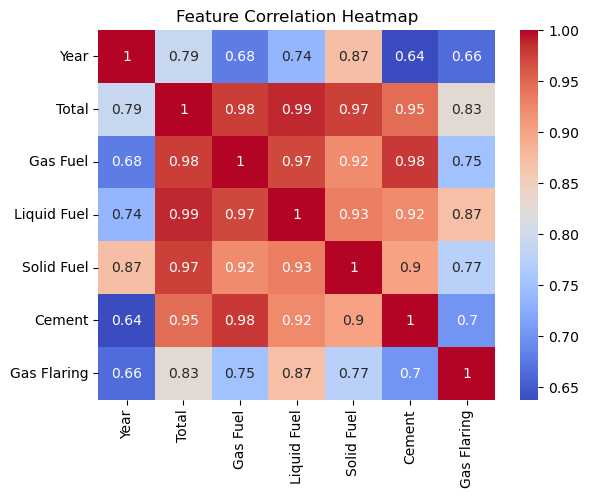

In [43]:
# Load dataset
file_path = 'flat.csv'  # Adjust path if needed
df = pd.read_csv(file_path)

# Basic info
print(df.info())
df.head

# Drop 'Per Capita' as it has many missing values
df.drop(columns=['Per Capita'], inplace=True)

# Check for any remaining missing values
print(df.isnull().sum())

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()



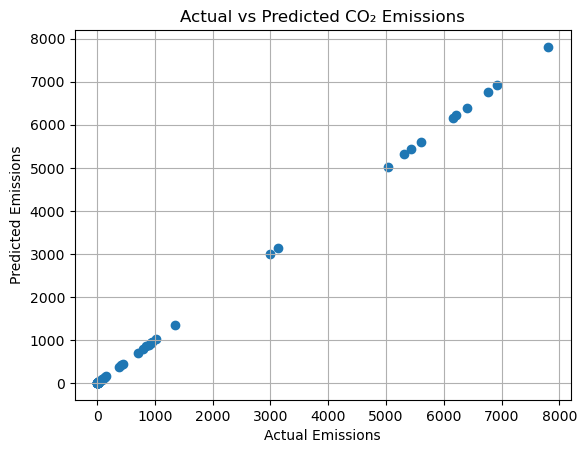

In [45]:
# Features (independent variables)
X = df[['Gas Fuel', 'Liquid Fuel', 'Solid Fuel', 'Cement', 'Gas Flaring']]

# Target (dependent variable)
y = df['Total']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


plt.scatter(y_test, y_pred)
plt.xlabel("Actual Emissions")
plt.ylabel("Predicted Emissions")
plt.title("Actual vs Predicted CO₂ Emissions")
plt.grid(True)
plt.show()


y_pred = model.predict(X_test)



In [47]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

df['Sum'] = df[['Gas Fuel', 'Liquid Fuel', 'Solid Fuel', 'Cement', 'Gas Flaring']].sum(axis=1)
(df['Sum'] - df['Total']).describe()

import numpy as np
df['Total_noisy'] = df['Total'] + np.random.normal(0, 2, size=len(df))

df['Emissions_Class'] = pd.cut(df['Total'], bins=[0, 100, 500, 1000, np.inf], labels=['Low', 'Medium', 'High', 'Very High'])




Mean Squared Error: 0.30
R² Score: 1.0000


In [49]:
import numpy as np
import pandas as pd

# Define bins and labels
bins = [0, 100, 500, 1000, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High']

# Create classification target
df['Emissions_Class'] = pd.cut(df['Total'], bins=bins, labels=labels)

# Check distribution
print(df['Emissions_Class'].value_counts())



Emissions_Class
Low          112
Very High     80
Medium        36
High          32
Name: count, dtype: int64


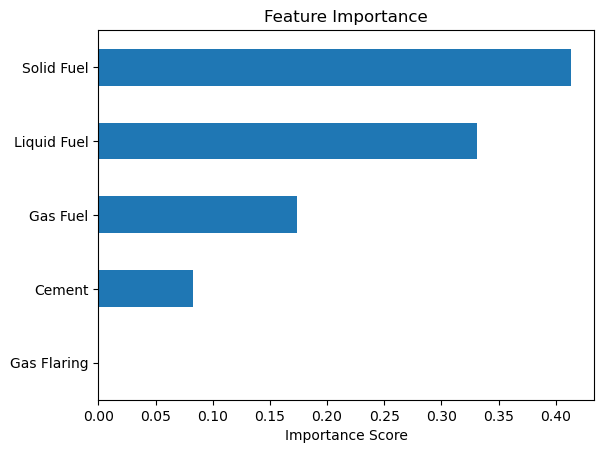

Confusion Matrix:


In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Emissions_Class_Label'] = le.fit_transform(df['Emissions_Class'])

# Now you have X and y
X = df[['Gas Fuel', 'Liquid Fuel', 'Solid Fuel', 'Cement', 'Gas Flaring']]
y = df['Emissions_Class_Label']

import matplotlib.pyplot as plt

feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', title='Feature Importance')
plt.xlabel("Importance Score")
plt.show()


print("Confusion Matrix:")